<a href="https://colab.research.google.com/github/murtazav/Model_predictive_control/blob/master/Parameter_finder_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# best controller parameterfinder using genetic algorithm
import numpy as np
import random
from matplotlib import pyplot as plt

kp_arr = np.zeros(8)
ki_arr = np.zeros(8)
fit_arr = np.zeros(8)
kp_max = 100.0
kp_min = 0.0
ki_max = 100.0
ki_min = 0.0
itr = 20



In [0]:
#environment with bicycle model which returns fitness of a controller
def envm(kp, ki):
  mfl=158  # mass at front left wheel
  mfr=137  # mass at front right wheel
  mrl=360  # mass at rear left wheel
  mrr=269  # mass at front right wh

  m = 924  #mass of the vehicle

  lf= 1.31  # location of centre of gravity from the front axle
  lr=0.62   # location of centre of gravity from the rear axle
  Iz=748    # moment of inertia
  l=lf+lr

  V=1
  #cornering stiffness of tyre
  Cf=27359
  Cr=58535
  dt=0.001
  tf=10
  vy = np.zeros(15000)
  vy_dot = np.zeros(15000)
  delt_4 = np.zeros(15000) 
  theta_dot = np.zeros(15000)
  theta_4 = np.zeros(15000)
  theta_des = np.zeros(15000)
  theta_ddot = np.zeros(15000)
  e = np.zeros(15000)
  e_int = np.zeros(15000)
  fitness =0
  time = np.zeros(15000)
  for i in range(1,len(time)):
    time[i] = time[i-1]+dt
  i=1
  for t in time[0:10000]:
    if i>=1000:
      theta_des[i]=0.349

    e[i] = (theta_des[i]-theta_4[i-1])
    fitness = fitness - np.power(t,2)*np.absolute(e[i])*dt
    e_int[i] = e_int[i-1]+e[i]*0.001
    delt_4[i]=kp*e[i]+ki*e_int[i]

    vy_dot[i]=-V*theta_dot[i-1]+1/m*(Cr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt_4[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt_4[i]))
    theta_ddot[i]=1/Iz*(Cr*lr*(-np.arctan((vy[i-1]-lr*theta_dot[i-1])/V))+Cf*(delt_4[i]-np.arctan((vy[i-1]+lf*theta_dot[i-1])/V))*np.cos(delt_4[i])*lf)

    theta_dot[i] = theta_ddot[i]*dt +theta_dot[i-1]
    theta_4[i] = theta_dot[i]*dt+theta_4[i-1]
    vy[i] = vy_dot[i]*dt+vy[i-1]
    i = i+1
    #print(fitness)
  plt.plot(time[0:10000],theta_4[0:10000])
  plt.plot(time[0:10000],theta_des[0:10000])
  
  return fitness



-1.9976333866589142

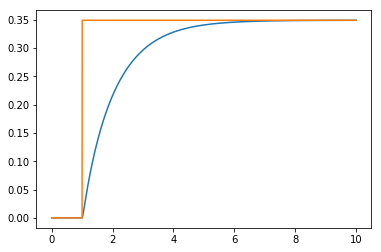

In [3]:
envm(1.7,0)

In [0]:
# to randomly generate a contorller within the range
def random_birth(kp_arr, ki_arr):
  for i in range(8):
    kp_arr[i] = random.uniform(kp_min, kp_max)
    ki_arr[i]= random.uniform(ki_max, kp_min)
  return kp_arr, ki_arr

# to generate offspring from the best parents with added mutation
def offspring(kp_mean, kp_std, ki_mean, ki_std):
  kp = random.random()*kp_mean +kp_std
  ki = random.random()*ki_mean + ki_std

  #mutation 
  if random.random() < 0.1 :
    kp = kp + random.choice([1,-1])*0.01*(random.random()*kp_mean+kp_std)
    ki = ki + random.choice([1,-1])*0.01*(random.random()*ki_mean+ki_std)
  return kp, ki
	



In [0]:
# to iteratively create and delete generations to reach the generaton with best fitness score
def iterations(kp_arr, ki_arr, fit_arr):
  for i in range(itr):
    for j in range(8):
      fit_arr[j] = envm(kp_arr[j], ki_arr[j])

    # sort remove the 4 controllers with worst fitness
    sorted_index = np.argsort(fit_arr)
    kp_arr = kp_arr[sorted_index]
    ki_arr = ki_arr[sorted_index]
    fit_arr = fit_arr[sorted_index]
    print(str(kp_arr[-1])+'  '+str(ki_arr[-1])+'  '+str(fit_arr[-1]))
    # generate offsprings with the best four controllers

    kp_mean = np.mean(kp_arr[4:8])
    kp_std = np.std(kp_arr[4:8])
    ki_mean = np.mean(ki_arr[4:8])
    ki_std = np.std(ki_arr[4:8])
    for j in range(4):
      kp_arr[j], ki_arr[j] = offspring(kp_mean, kp_std, ki_mean, ki_std)
    
  return kp_arr, ki_arr, fit_arr

In [6]:
a=np.array([1,33,455,67,0,8])
a[np.argsort(a)]

array([  0,   1,   8,  33,  67, 455])

In [0]:
kp_arr, ki_arr = random_birth(kp_arr, ki_arr)


83.98758300994393  64.41655531938403  -62703211287.67319
48.92559236321469  41.37142887000098  -11436271.033928452
48.92559236321469  41.37142887000098  -11436271.033928452
48.92559236321469  41.37142887000098  -11436271.033928452
48.92559236321469  41.37142887000098  -11436271.033928452
33.31083955204523  10.73307182283738  -36.483640982627456
33.31083955204523  10.73307182283738  -36.483640982627456
33.31083955204523  10.73307182283738  -36.483640982627456
33.31083955204523  10.73307182283738  -36.483640982627456
33.31083955204523  10.73307182283738  -36.483640982627456
16.411055037380763  23.042255067983458  -0.2503344871334062
16.411055037380763  23.042255067983458  -0.2503344871334062
16.411055037380763  23.042255067983458  -0.2503344871334062
17.860314019398963  15.881909971174185  -0.09685294584165889
17.860314019398963  15.881909971174185  -0.09685294584165889
17.860314019398963  15.881909971174185  -0.09685294584165889
17.860314019398963  15.881909971174185  -0.096852945841658

(array([ 8.64474861, 13.53928923,  5.87138382, 13.84966621,  9.01231843,
        16.41105504, 17.86031402, 17.90477875]),
 array([19.35945598, 10.58448802, 12.28506387,  3.5164971 , 17.82757712,
        23.04225507, 15.88190997, 16.25538844]),
 array([-1.04669536e+11, -1.12436891e+00, -2.93917701e-01, -2.88895853e-01,
        -2.62456416e-01, -2.50334487e-01, -9.68529458e-02, -9.12187355e-02]))

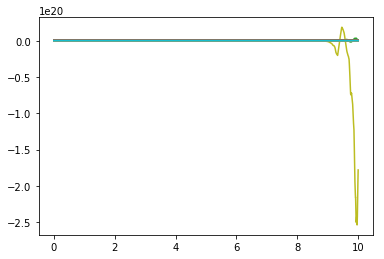

In [8]:
iterations(kp_arr, ki_arr, fit_arr)

-0.134148811607187

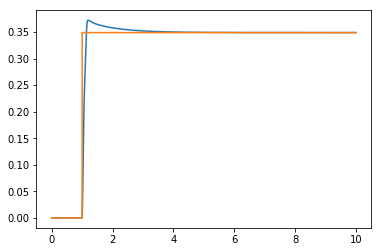

In [12]:
envm(17.424, 16.255)